## Support Vector Machines
- SVM is a powerful classifier that works both on linearly and non-linearly separable data
<img src="../img/linearly_separable.png" alt="Linear Separable" style="width: 500px;"/>


- Finds an optimal hyperplane, that best separates our data so that the distance from nearest points in space to itself(also called margin) is maximized
- These nearest points are called **Support Vectors**

<img src="../img/margin_svm.png" alt="Pizza-1" style="width: 300px;"/>

- For the non-linearly separable case, it uses something called 'Kernel Trick' which will go through in the next part.

## What does hyperplane mean ?

<img src="../img/hyperplanes.jpg" alt="Hyperplanes" style="width: 250px;"/>

A hyperplane is plane of _n-1_ dimensions in _n_ dimensional feature space, that separates the two classes. 
For a 2-D feature space, it would be a line and for a 3-D Feature space it would be plane and so on.

<img src="../img/3d_hyperplane.png" alt="Hyperplanes" style="width: 200px;"/>



A hyperplane is able to separate classes if for all points -

#### **_w_ x** + b > 0 
(For data points in class 1)  
#### **_w_ x** + b < 0 
(For data points in  class 0)
(**See file 01file.pdf: last page**: to understand meaning of this above. Why do we do wx+b>0)

## Maximum Margin Hyperplane 

An optimal hyperplane best separates our data so that the distance/margin from nearest points(called Support Vectors) in space to itself is maximized.

<img src="../img/maximum_margin.png" alt="Hyperplanes" style="width: 300px;"/>


### SVM Implementation using Pegasos

**Formulating SVM as Unconstrainted Optimization Problem**

Paper - [Pegasos: Primal Estimated sub-GrAdient SOlver for SVM](http://www.ee.oulu.fi/research/imag/courses/Vedaldi/ShalevSiSr07.pdf)

The final SVM Objective we derived was -

<img src="../img/loss.png" alt="Hinge Loss" style="width: 400px;"/>

## Generate Dataset

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

In [8]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

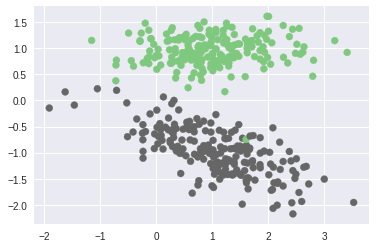

In [9]:
plt.style.use('seaborn')
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=Y, cmap=plt.cm.Accent)
plt.show()

In [10]:
print(Y[:20])   ## see our first 20 y_labels

[0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1]


In [12]:
# Convert our Y-Labels into {1,-1}
Y[Y==0] = -1 #Broadcasting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

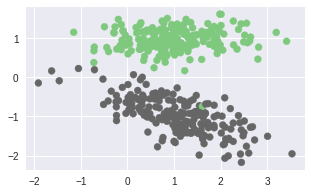

In [13]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0],X[:,1],c=Y, cmap=plt.cm.Accent)
plt.show()

### Implementation: 
Loss Functions is:<img src="../img/loss.png" alt="Hinge Loss" style="width: 400px;"/>


In [15]:
ids = np.arange(X.shape[0])
np.random.shuffle(ids)
print(ids[:10])

[318   2 185  11  29 184 345 379 245  87]


In [17]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0        
        loss += .5*np.dot(W,W.T)
        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(W,X[i].T)+b)  ## t for ith iteration
## see size of X,w then do transpose by checking what you need. eg- W:(1,n) and X=(1,n)- single 
## example. So (1,n)*(n,1) gives us (1,1) . That's why we did W*X.T
## instead if w is (n,1), then we do (1,n)*(n,1) => X*w
## We can do transpose or not depending on the size of X, w and size of result required
            
            loss += self.C*max(0,(1-ti))
        return loss[0][0]   ## loss is like [[400]] => array, so return loss[0][0] (value)
    ## we will use this above function in our training 
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):  ## training function
        m,n = X.shape
        c = self.C
        
        #Init the model parameters by zeros
        W = np.zeros((1,n))
        bias = 0

        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []   ## list to store error in each step
        
        for i in range(maxItr): #Training Loop
            l = self.hingeLoss(W,bias,X,Y)  
            losses.append(l)  ## add error after each step here.

            ids = np.arange(m)
            np.random.shuffle(ids)  ## shuffle ids in each epoch before using mini-batch GD
            
            #Mini Batch Gradient Descent(used in pegasos Paper) with random shuffling
            for batch_start in range(0,m,batch_size):
                #Assume 0 gradient for each batch initially
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<m:
                        i = ids[j]  ## i is idx for random values in the batch
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
## after ending of each whole epoch: 'i' will be changed to no_of_iterations: 0,1,2...max_iter
## according to first for loop                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                # Now update W,b after calculating gradient over all examples in mini-batch
                W = W - learning_rate*W + learning_rate*gradw
                bias = bias + learning_rate*gradb
                ## update W,b for all batches.
        
        self.W = W
        self.b = bias
        return W,bias,losses        

## Optimized code
- Here I've used n+1 features instead of n featured w and 1 bias term 

In [18]:
class SVM2:
    def __init__(self,C=1.0):  # pass value of hyperparameter c
        self.C = C   ## hyperparameter c: for giving panelty. 
        ## theta is a vector. But initialize it with 0. We will assign vector in fit() method
        self.theta = 0  ## use single 'theta' which is combination of W,b 
        
    def hingeLoss(self,theta,X,Y):  # to calculate loss after each update    
        loss  = 0.0
        loss += .5*np.dot(theta,theta.T)

        loss_2 = 0
        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(theta,X[i].T))  ## X is now: (m,n+1) and W is: (n+1,)
            loss_2 += max(0,(1-ti))
        loss = loss + self.C*loss_2
        return loss[0][0]  ## loss is a array as [[value]], so return loss[0][0] to return int.
    ## we will use this above function in fit() method to calculate loss after each epoch
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        m,n = X.shape        
        c = self.C
    
        ## add 1s column to make it n+1 features 
        ones = np.ones((X.shape[0],1)) # rows same as in X_train and one column
        X = np.hstack((ones, X)) 

        #Init the model parameters
        theta = np.zeros((1,n+1))  ## create a vector of size n+1
        
        #Training starts from here...
        losses = []  ## to store losses in each step
        
        ## using Mini-Batch Gradient Descent Algo
        for i in range(maxItr):     #Training Loop
            l = self.hingeLoss(theta,X,Y)
            losses.append(l)  ## store loss in each step in this list 
            ids = np.arange(m) ## create list for index values and then shuffle them
            np.random.shuffle(ids) ## shuffle these and choose batches randomly in each iteration

            # eg- If batch_size=8, then pick first 8 ids after shuffling(means random 10 ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            
            ## If batch size=8, m=50, then iterate over: 0,8,16,24,32,40,48 (take step of 8) 
            for batch_start in range(0,m,batch_size): ## from 0..m with step_size=batch_size
            ## here 'batch_start' is start idx of every mini batch.
                gradw = 0  ## assume gradient=0 for each mini-batch initially
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    ## if j crosses 'm' then get out of loop
# eg- last batch start from 48:56 ,But m=50, so j need to stop after 50 
                    if j>=m:
                        break
                    else:
                        i = ids[j]  ## i is idx for random values in the batch
                        ti =  Y[i]*(np.dot(theta,X[i].T))
                        ## we have used same variable 'i' for outer for loop and here to save memory
## after ending of each whole epoch: 'i' will be changed to no_of_iterations: 0,1,2...max_iter
## , according to first 'for' loop=>(this is to save memory, or we can use different variable for outer for loop and here)
                        if ti<=1:
                            gradw += c*Y[i]*X[i]
                            
                # Now update W,b after calculating gradient over all examples in mini-batch
                theta = theta - learning_rate*theta + learning_rate*gradw                
                ## update theta each mini batch.
        self.theta = theta
        return theta,losses        

In [19]:
import time
start= time.time()

mySVM = SVM(C=1)   ## create object
W,b,losses = mySVM.fit(X,Y,maxItr=100)
print("Initial loss: ", losses[0])
print("Final loss: ", losses[-1])
print("Time Taken: ",time.time() - start)

Initial loss:  400.0
Final loss:  14.965118079822437
Time Taken:  0.8219161033630371


In [23]:
## optimized algorithm
start = time.time()

mySVM2 = SVM2(C=1)
theta, losses2 = mySVM2.fit(X,Y,maxItr=100)
print("Initial loss: ", losses2[0])
print("Final loss: ", losses2[-1])
print("Time taken: ", time.time() - start)

Initial loss:  400.0
Final loss:  15.183593839892357
Time taken:  0.6503293514251709


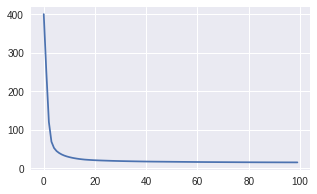

In [24]:
plt.figure(figsize=(5,3))
plt.plot(losses)
plt.show()

In [25]:
## after using svm2.fit(), we can get theta from svm2.theta attribute also
theta = mySVM2.theta
print(theta)

[[ 0.37301355 -0.3186244  -2.01719818]]


In [26]:
def plotHyperplane(b, w1, w2):    
    plt.figure(figsize=(10,10))
    ## our X_data lies in -2 to 4(see plot in beginning). So generate 10points in range (-2 to 4)
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2 # WT + B = 0
    
    x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
    x_n = -(w1*x_1+b-1)/w2 # WT + B = +1
    
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0",)
    plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y, cmap=plt.cm.Accent)
    plt.show()    

In [27]:
theta
## theta has buas term as 1st value and weights as 2nd onwards

array([[ 0.37301355, -0.3186244 , -2.01719818]])

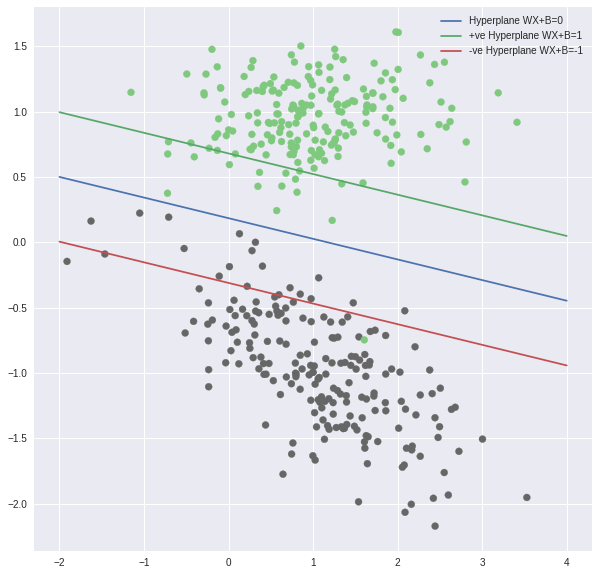

In [28]:
plotHyperplane(theta[0,0], theta[0,1], theta[0,2])

## Visualising Support Vectors, Positive and Negative Hyperplanes
- Effect of changing 'C' - Penalty constant

In [33]:
# Effect the changing 'C' - Penalty Constant
mySVM2 = SVM2(C=1000)   ## give a high penalty
theta, losses = mySVM2.fit(X, Y)
print(losses[0])  ## print initial loss
print(losses[-1])  ## print final loss

400000.0
18241.290707140615


- Now we can see that initial loss is very high and final loss is very high. This is bcoz: c=1000 gives very high penalty to each point. So SVM will try to make very low error(see in figure). But here margin is also low which increases the value of $WW^T$
- Loss = <img src="../img/loss.png" alt="Hinge Loss" style="width: 400px;"/>

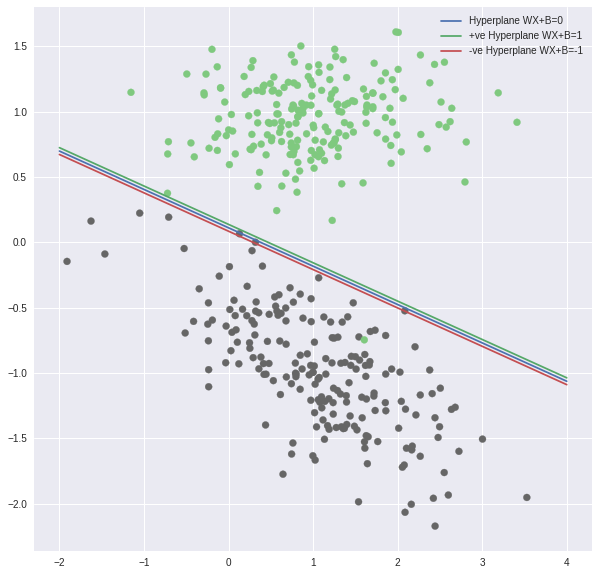

In [35]:
plotHyperplane(theta[0,0],theta[0,1], theta[0,2])

##### So we need best values of hyperparameters like 'c' . To find best value of 'c' and other hyperparameters, we do **GridSearch**. We'll see it in later notebooks

### Predictions: 
- Now we got w,b or theta from SVM model and we can do testing as: calculate w.T*x + b. If this distance>0 then +ve class else -ve class.
- But we need to convert our testing arrat first to n+1 features with a column of 1s as 1st feature if we are using theta instead of w,b